# Kaggle Competition - Season 4 Episode 11

## Exploring data

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('./train.csv')
df.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [67]:
df.describe()

id            Age  Academic Pressure  Work Pressure  \
count  140700.000000  140700.000000       27897.000000  112782.000000   
mean    70349.500000      40.388621           3.142273       2.998998   
std     40616.735775      12.384099           1.380457       1.405771   
min         0.000000      18.000000           1.000000       1.000000   
25%     35174.750000      29.000000           2.000000       2.000000   
50%     70349.500000      42.000000           3.000000       3.000000   
75%    105524.250000      51.000000           4.000000       4.000000   
max    140699.000000      60.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27898.000000        27897.000000     112790.000000     140700.000000   
mean       7.658636            2.944940          2.974404          6.252679   
std        1.464466            1.360197          1.416078          3.853615   
min        5.030000            1.000000          1.000000          0.000000   
25%        6.290000            2.000000          2.000000          3.000000   
50%        7.770000            3.000000          3.000000          6.000000   
75%        8.920000            4.000000          4.000000         10.000000   
max       10.000000            5.000000          5.000000         12.000000   

       Financial Stress     Depression  
count     140696.000000  140700.000000  
mean           2.988983       0.181713  
std            1.413633       0.385609  
min            1.000000       0.000000  
25%            2.000000       0.000000  
50%            3.000000       0.000000  
75%            4.000000       0.000000  
max            5.000000       1.000000

In [68]:
#Checking missing values
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [69]:
# Follow the copy method practice
dropping_cols = ['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Working Professional or Student']
# Check if columns exist in the dataframe before dropping them
dropping_cols = [col for col in dropping_cols if col in df.columns]
df.drop(dropping_cols, inplace=True, axis=1)

In [70]:
df.describe()

id            Age  Work Pressure  Job Satisfaction  \
count  140700.000000  140700.000000  112782.000000     112790.000000   
mean    70349.500000      40.388621       2.998998          2.974404   
std     40616.735775      12.384099       1.405771          1.416078   
min         0.000000      18.000000       1.000000          1.000000   
25%     35174.750000      29.000000       2.000000          2.000000   
50%     70349.500000      42.000000       3.000000          3.000000   
75%    105524.250000      51.000000       4.000000          4.000000   
max    140699.000000      60.000000       5.000000          5.000000   

       Work/Study Hours  Financial Stress     Depression  
count     140700.000000     140696.000000  140700.000000  
mean           6.252679          2.988983       0.181713  
std            3.853615          1.413633       0.385609  
min            0.000000          1.000000       0.000000  
25%            3.000000          2.000000       0.000000  
50%            6.000000          3.000000       0.000000  
75%           10.000000          4.000000       0.000000  
max           12.000000          5.000000       1.000000

## Dealing with missing values

Check for missing entries

In [71]:
#Retrieve missing cols
missing_cols = df.isnull().sum().loc[df.isnull().sum() != 0]
missing_cols    #Series 

Profession          36630
Work Pressure       27918
Job Satisfaction    27910
Dietary Habits          4
Degree                  2
Financial Stress        4
dtype: int64

In [72]:
#Check the nature of these cols
'''
Profession - Categorical
Work pressure - Numerical
Job satisfaction - Numerical
Dietary Habits - Categorical
Degree - Categorical             
Financial Stress - Numerical    
'''
df[missing_cols.index]

Profession  Work Pressure  Job Satisfaction Dietary Habits  \
0                    Chef            5.0               2.0        Healthy   
1                 Teacher            4.0               3.0      Unhealthy   
2                     NaN            NaN               NaN        Healthy   
3                 Teacher            5.0               1.0       Moderate   
4        Business Analyst            1.0               1.0      Unhealthy   
...                   ...            ...               ...            ...   
140695                NaN            5.0               4.0      Unhealthy   
140696     Content Writer            5.0               4.0       Moderate   
140697  Marketing Manager            3.0               1.0       Moderate   
140698            Plumber            5.0               2.0       Moderate   
140699                NaN            NaN               NaN        Healthy   

          Degree  Financial Stress  
0            BHM               2.0  
1            LLB               3.0  
2        B.Pharm               1.0  
3            BBA               1.0  
4            BBA               4.0  
...          ...               ...  
140695  Class 12               4.0  
140696    B.Tech               5.0  
140697     B.Com               4.0  
140698        ME               1.0  
140699       BCA               3.0  

[140700 rows x 6 columns]

In [73]:
#Now we check for unique values in each of them
df[missing_cols.index].nunique()

Profession           64
Work Pressure         5
Job Satisfaction      5
Dietary Habits       23
Degree              115
Financial Stress      5
dtype: int64

In [74]:
#We first deal with low/less amt of missing val cols
low_missing_cols = df[missing_cols.index].isnull().sum().index[-3:] 
high_missing_cols = df[missing_cols.index].isnull().sum().index[:3]
# print(low_missing_cols)
# print('\n', high_missing_cols)

Redundancy to check for enough records after dropping missing values

In [75]:
#Check whether there are enough records to train the model
# df_without_names = df.drop(['Name', 'id'], axis=1)
# number_of_duplicates = df_without_names.duplicated().sum()

Drop missing value entries with low frequency

In [76]:
# We can simply drop the tuples in low_missing_cols
low_missing_cols = [col for col in low_missing_cols if col in df.columns]
df = df.dropna(subset=low_missing_cols)

In [77]:
#There are rows with the same profession as the name
#We need to remove these first
no_rows_prof_equal = df[df['Name'] == df['Profession']]['id'].count()   #6
#Since there are only six rows with same name as profession, we can drop them as well
df = df[df['Name'] != df['Profession']]

Dealing with missing value entries with high frequency

Axes(0.125,0.11;0.62x0.77)


id       Age  Work Pressure  Job Satisfaction  \
id                1.000000  0.001820       0.002583          0.001187   
Age               0.001820  1.000000      -0.061698          0.029928   
Work Pressure     0.002583 -0.061698       1.000000         -0.032073   
Job Satisfaction  0.001187  0.029928      -0.032073          1.000000   
Work/Study Hours  0.004632 -0.050402      -0.010038         -0.023962   
Financial Stress -0.001304 -0.039777       0.014897         -0.022484   

                  Work/Study Hours  Financial Stress  
id                        0.004632         -0.001304  
Age                      -0.050402         -0.039777  
Work Pressure            -0.010038          0.014897  
Job Satisfaction         -0.023962         -0.022484  
Work/Study Hours          1.000000          0.013927  
Financial Stress          0.013927          1.000000

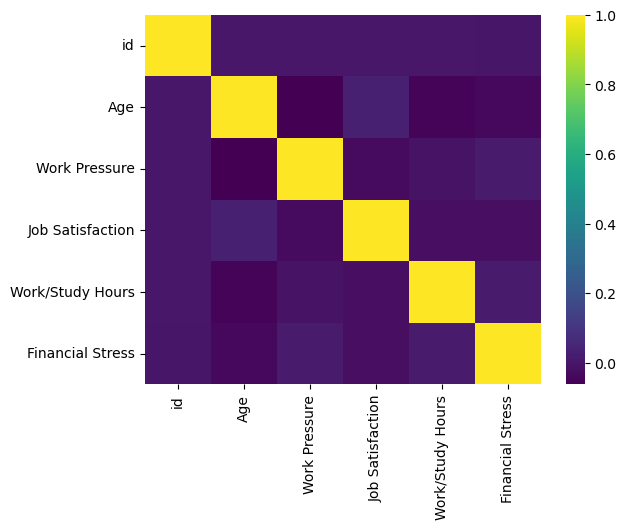

In [90]:
#To deal with cols with high frequency of null tuples
df.isnull().sum()
# df.columns
temp_df = df.copy()
temp_df.dropna(axis=0, inplace=True, how='any')
lol = temp_df.groupby('Profession')
temp_df.nunique()
lol1 = temp_df.select_dtypes(exclude=['object'])
lol2 = temp_df.select_dtypes(exclude=['object']).drop('Depression', axis=1)


import seaborn as sns
print(sns.heatmap(lol2.corr(), cmap = 'viridis'))
lol2.corr()